# Author-Allan Paul



# Intern-The Sparks Foundation 

# Domain-Data Science and Business Analytics Internship

# TASK 1:Prediction using supervised ML

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [1]:
#importing the packages

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
#reading the file
df=pd.read_csv("E:\Sparks\Scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#to describe the entire data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# to check information about the data and to check null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Hours     0
Scores    0
dtype: int64

As we can observe there are no null values,so no data cleaning is required

# DATA VISUALISATION

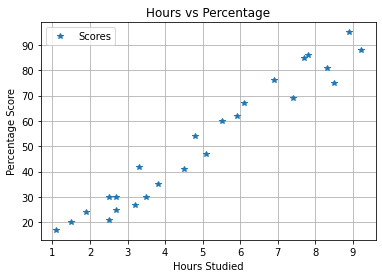

In [5]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [6]:
# to check correlation

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#  DATA PREPARATION

In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# TRAINING THE DATA

In [10]:
#splitting the data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [11]:
model = LinearRegression()  
model.fit(X_train, y_train) 



LinearRegression()

# VISUALISING THE MODEL

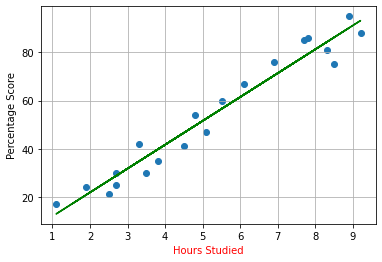

In [21]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train)
plt.plot(X, line,color='green');
plt.xlabel('Hours Studied',color='red')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

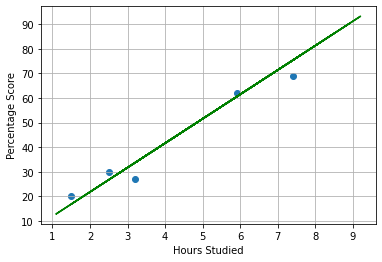

In [13]:
#plotting for test data
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X_test, y_test)
plt.plot(X, line,color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# MAKING PREDICTIONS

In [14]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [16]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
metrics.r2_score(y_test,y_pred)

0.9454906892105356

In [19]:
hours = 9.25
own_pred = model.predict([[hours]])
print("the predicted score if a student studies",hours,"is hours",own_pred)


the predicted score if a student studies 9.25 is hours [93.69173249]


# From the above result we can say that if a student studies for 9.25 hours/day he/she will score 93.69 percentage

# Evaluating the model




In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
